# Techniques for categorical variable encoding

Machine learning algorithms can not handle categorical variables unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical variables are encoded.

Categorical variables can be divided into two categories: Nominal (No particular order) and Ordinal (some ordered).

<img src="https://miro.medium.com/max/720/1*wYbTRM0dgnRzutwZq63xCg.png" alt="Girl in a jacket" width="500">

Nominal: Red, Yellow, Pink, Blue

Ordinal: High, Medium, Low

Best Library : https://contrib.scikit-learn.org/category_encoders/helmert.html


# Lets download some sample dataset from kaggle

In [15]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c cat-in-the-dat
! mkdir dataset
!unzip cat-in-the-dat -d dataset

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 90% 19.0M/21.2M [00:00<00:00, 192MB/s]
100% 21.2M/21.2M [00:00<00:00, 201MB/s]
Archive:  cat-in-the-dat.zip
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


# Import Section

In [33]:
import pandas as pd

### Loading data for categorical encoding


In [34]:
dataset = pd.read_csv('/content/dataset/train.csv')
dataset.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


## One Hot Encoding

* In this method, we map each category to a vector that contains 1 and 0, denoting the presence or absence of the feature. 
* The number of vectors depends on the number of categories for features. 
* This method produces many columns that slow down the learning significantly if the number of the category is very high for the feature. 
* Pandas has get_dummies function, which is quite easy to use. The sample data-frame code would be as below:
* One Hot Encoding is very popular. We can represent all categories by N-1 (N= No of Category) as sufficient to encode the one that is not included. 
* Usually, <font color = 'red'>for Regression, we use N-1 (drop first or last column of One Hot Coded new feature )</font>. Still, <font color = 'red'>for classification, the recommendation is to use all N columns</font> without as most of the tree-based algorithm builds a tree based on all available variables. 

In [35]:
dataset_one_hot_encoding = dataset[['nom_0']]
dataset_one_hot_encoding_bydummies = pd.get_dummies(dataset_one_hot_encoding, prefix = ['one_hot_enc'],columns = ['nom_0'])
dataset_one_hot_encoding_bydummies

,one_hot_enc_Blue,one_hot_enc_Green,one_hot_enc_Red
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
299995,0,0,1
299996,0,1,0
299997,1,0,0
299998,0,1,0


Scikit-learn has OneHotEncoder for this purpose, but it does not create an additional feature column

In [36]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(dataset_one_hot_encoding.nom_0.values.reshape(-1,1)).toarray()
ohe  =pd.DataFrame(ohe,columns = ["one_hot_enc_"+str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
ohe

,one_hot_enc_Blue,one_hot_enc_Green,one_hot_enc_Red
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
299995,0.0,0.0,1.0
299996,0.0,1.0,0.0
299997,1.0,0.0,0.0
299998,0.0,1.0,0.0


## Label Encoding

* In this encoding, each category is assigned a value from 1 through N (where N is the number of categories for the feature. 

* One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order or some relationship.

In [37]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
dataset_label_encoding = dataset[['nom_0']]
dataset_label_encoding["label_encoded_nom_0"] = LabelEncoder().fit_transform(dataset_label_encoding[['nom_0']])
dataset_label_encoding

,nom_0,label_encoded_nom_0
0,Green,1
1,Green,1
2,Blue,0
3,Red,2
4,Red,2
...,...,...
299995,Red,2
299996,Green,1
299997,Blue,0
299998,Green,1


* We can use pandas factorise function.

In [42]:
dataset_label_encoding["label_encoded_nom_0_factorise"] = pd.factorize(dataset_label_encoding['nom_0'])[0]
dataset_label_encoding

,nom_0,label_encoded_nom_0,label_encoded_nom_0_factorise
0,Green,1,0
1,Green,1,0
2,Blue,0,1
3,Red,2,2
4,Red,2,2
...,...,...,...
299995,Red,2,2
299996,Green,1,0
299997,Blue,0,1
299998,Green,1,0


# Ordinal Encoding
* We do Ordinal encoding to ensure the encoding of variables retains the ordinal nature of the variable. 
* This is reasonable only for ordinal variables, This encoding looks almost similar to Label Encoding but slightly different as Label coding would not consider whether the variable is ordinal or not, and it will assign a sequence of integers.

In [50]:
#dataset['ord_2'].value_counts()
# these cateories have some ordinal nature
ordinal_dict = {"Freezing":1,"Cold":2,"Warm":3,"Hot":4,"Boiling Hot":5,"Lava Hot":6}
ordinal = dataset[['ord_2']]
ordinal['ord2_encoded'] = ordinal.ord_2.map(ordinal_dict)
ordinal

,ord_2,ord2_encoded
0,Cold,2
1,Hot,4
2,Lava Hot,6
3,Boiling Hot,5
4,Freezing,1
...,...,...
299995,Freezing,1
299996,Freezing,1
299997,Boiling Hot,5
299998,Boiling Hot,5


# Helmert Encoding

* It compares levels of a variable with the mean of the subsequent levels of the variable. Simply put, each level of the variable is compared to the later level of variables.

* If there are L levels then the first comparison is of level vs. (L−1) other levels. The weights are then (L−1)/L for the first level and −1/L for each of the other levels. If the no.of levels are 4, then, L = 4 so the weights will be .75 and -.25 (3 times)

* The next comparison has only L−1 levels (the first level is no longer part of the comparisons), so now the weights are (L−2)/(L−1) for the first level and −1/(L−1) for the others (in our case, 2/3 and -1/3. And it goes on.

* This type of encoding is useful when the levels of the categorical variable are ordered in a meaningful way.

In [62]:
#! pip install category_encoders
# https://contrib.scikit-learn.org/category_encoders/helmert.html
import category_encoders as ce
helmert_encoder = ce.HelmertEncoder(cols = ['ord_2'],drop_invariant = True)
helmert_encoding = helmert_encoder.fit_transform(dataset['ord_2'])
helmert_encoding['ord_2'] = dataset['ord_2']
helmert_encoding

,ord_2_0,ord_2_1,ord_2_2,ord_2_3,ord_2_4,ord_2
0,-1.0,-1.0,-1.0,-1.0,-1.0,Cold
1,1.0,-1.0,-1.0,-1.0,-1.0,Hot
2,0.0,2.0,-1.0,-1.0,-1.0,Lava Hot
3,0.0,0.0,3.0,-1.0,-1.0,Boiling Hot
4,0.0,0.0,0.0,4.0,-1.0,Freezing
...,...,...,...,...,...,...
299995,0.0,0.0,0.0,4.0,-1.0,Freezing
299996,0.0,0.0,0.0,4.0,-1.0,Freezing
299997,0.0,0.0,3.0,-1.0,-1.0,Boiling Hot
299998,0.0,0.0,3.0,-1.0,-1.0,Boiling Hot


## Binary Encoding

* Binary encoding converts a category into binary digits. Each binary digit creates one feature column. 
* If there are n unique categories, then binary encoding results in the only log(base 2)ⁿ features. 
* If have four features; then, the binary encoded features will be three features. Compared to One Hot Encoding, this will require fewer feature columns (for 100 categories, One Hot Encoding will have 100 features, while for Binary encoding, we will need just seven features).

* For Binary encoding, one has to follow the following steps:

* The categories are first converted to numeric order starting from 1 (order is created as categories appear in a dataset and do not mean any ordinal nature)
* Then those integers are converted into binary code, so for example, 3 becomes 011, 4 becomes 100
* Then the digits of the binary number form separate columns.

<img src = 'https://miro.medium.com/max/720/1*VuNZWUX6b7GUGB0zRu2zrA.png' width = 500px >

In [67]:
print(dataset['ord_5'].unique())
# for ord_5 we have multiple 192 categories and when we try to use onehotencoder we will get 192 columns which is not desirable
binary_encoder = ce.BinaryEncoder()
binaryencoding = binary_encoder.fit_transform(dataset['ord_5'])
binaryencoding['ord_5'] = dataset['ord_5']
binaryencoding

['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' 'Os' 'Ps' 'Ml' 'Ai' 'Wc' 'GD' 'll' 'aF' 'iT' 'cA' 'WE'
 'Gx' 'Nk' 'OR' 'Rm' 'BA' 'eG' 'cW' 'jS' 'DH' 'hL' 'Mf' 'Yb' 'Aj' 'oH'
 'Zc' 'qJ' 'eg' 'xP' 'vq' 'Id' 'pa' 'ux' 'kU' 'Cl']


,ord_5_0,ord_5_1,ord_5_2,ord_5_3,ord_5_4,ord_5_5,ord_5_6,ord_5_7,ord_5
0,0,0,0,0,0,0,0,1,kr
1,0,0,0,0,0,0,1,0,bF
2,0,0,0,0,0,0,1,1,Jc
3,0,0,0,0,0,1,0,0,kW
4,0,0,0,0,0,1,0,1,qP
...,...,...,...,...,...,...,...,...,...
299995,0,0,0,1,1,0,1,1,dh
299996,1,0,0,1,0,1,1,0,MO
299997,0,1,0,0,1,0,1,1,Bn
299998,1,0,0,1,0,0,1,0,uJ


# Frequency Encoding

* It is a way to utilize the frequency of the categories as labels. 
* In the cases where the frequency is related somewhat to the target variable, it helps the model understand and assign the weight in direct and inverse proportion, depending on the nature of the data. Three-step for this :

1. Select a categorical variable you would like to transform
2. Group by the categorical variable and obtain counts of each category
3. Join it back with the training dataset

In [76]:
frequency_encoding = dataset[['ord_2']]
frequency_encoding['frequency_encoded'] = dataset['ord_2'].map(dataset.groupby('ord_2').size()/len(dataset))
frequency_encoding

,ord_2,frequency_encoded
0,Cold,0.112560
1,Hot,0.074090
2,Lava Hot,0.213027
3,Boiling Hot,0.202090
4,Freezing,0.332720
...,...,...
299995,Freezing,0.332720
299996,Freezing,0.332720
299997,Boiling Hot,0.202090
299998,Boiling Hot,0.202090


## Mean Encoding

* Mean Encoding or Target Encoding is one viral encoding approach followed by Kagglers. 
* Mean encoding is similar to label encoding, except here labels are correlated directly with the target. 
* For example, in mean target encoding for each category in the feature label is decided with the mean value of the target variable on training data. 
* This encoding method brings out the relation between similar categories, but the connections are bounded within the categories and target itself. 
* The advantages of the mean target encoding are that it does not affect the volume of the data and helps in faster learning. 
* Usually, Mean encoding is notorious for over-fitting; thus, a regularization with cross-validation or some other approach is a must on most occasions. Mean encoding approach is as below:

1. Select a categorical variable you would like to transform.
2. Group by the categorical variable and obtain aggregated sum over the “Target” variable. (total number of 1’s for each category in ‘Temperature’)

3. Group by the categorical variable and obtain aggregated count over “Target” variable

4. Divide the step 2 / step 3 results and join it back with the train.

![](https://miro.medium.com/max/720/1*iiM9g-qCa-Vff_HAFk-ppQ.png)

In [82]:
mean_encode = dataset.groupby('ord_2')['target'].mean()
mean_encoding = dataset[['ord_2']]
mean_encoding['mean_endoded'] = dataset['ord_2'].map(mean_encode)
mean_encoding

,ord_2,mean_endoded
0,Cold,0.257877
1,Hot,0.326315
2,Lava Hot,0.403126
3,Boiling Hot,0.360961
4,Freezing,0.225214
...,...,...
299995,Freezing,0.225214
299996,Freezing,0.225214
299997,Boiling Hot,0.360961
299998,Boiling Hot,0.360961


# Weight of Evidence Encoding

Weight of Evidence (WoE) measures the “strength” of a grouping technique to separate good and bad. This method was developed primarily to build a predictive model to evaluate the risk of loan default in the credit and financial industry. Weight of evidence (WOE) measures how much the evidence supports or undermines a hypothesis.

It is computed as below:

![](https://miro.medium.com/max/450/1*AqcqDwUB4fk8rcmbvxGiEQ.gif)

* WoE will be 0 if the P(Goods) / P(Bads) = 1. That is, if the outcome is random for that group. If P(Bads) > P(Goods) the odds ratio will be < 1 and the WoE will be < 0; if, on the other hand, P(Goods) > P(Bads) in a group, then WoE > 0.

* WoE is <font color = 'red'>well suited for Logistic Regression </font>because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in Logistic Regression, the predictors are prepared and coded to the same scale. The parameters in the linear logistic regression equation can be directly compared.

## The WoE transformation has (at least) three advantage:

1) It can transform an independent variable to establish a monotonic relationship to the dependent variable. It does more than this — to secure a monotonic relationship it would be enough to “recode” it to any ordered measure (for example 1,2,3,4…), but the WoE transformation orders the categories on a “logistic” scale which is natural for Logistic Regression

2) For variables with too many (sparsely populated) discrete values, these can be grouped into categories (densely populated), and the WoE can be used to express information for the whole category

3) The (univariate) effect of each category on the dependent variable can be compared across categories and variables because WoE is a standardized value (for example, you can compare WoE of married people to WoE of manual workers)

## It also has (at least) three drawbacks:

1) Loss of information (variation) due to binning to a few categories

2) It is a “univariate” measure, so it does not take into account the correlation between independent variables

3) It is easy to manipulate (over-fit) the effect of variables according to how categories are created

In [86]:

# https://contrib.scikit-learn.org/category_encoders/woe.html
encoder = ce.woe.WOEEncoder()
encoded = encoder.fit_transform(dataset['ord_5'],dataset['target'])
encoded['ord_3_real'] = dataset['ord_5']
encoded

,ord_5,ord_3_real
0,0.420532,kr
1,-0.008737,bF
2,-0.523234,Jc
3,0.227089,kW
4,0.432324,qP
...,...,...
299995,0.033989,dh
299996,-0.415855,MO
299997,-0.705175,Bn
299998,0.572812,uJ


# Probability Ratio Encoding

* Probability Ratio Encoding is similar to Weight Of Evidence(WoE), with the only difference is the only ratio of good and bad probability is used. 

*( For each label, we calculate the mean of target=1, that is, the probability of being 1 ( P(1) ), and also the probability of the target=0 ( P(0) ). 

* And then, we calculate the ratio P(1)/P(0) and replace the labels with that ratio. We need to add a minimal value with P(0) to avoid any divide by zero scenarios where for any particular category, there is no target=0.

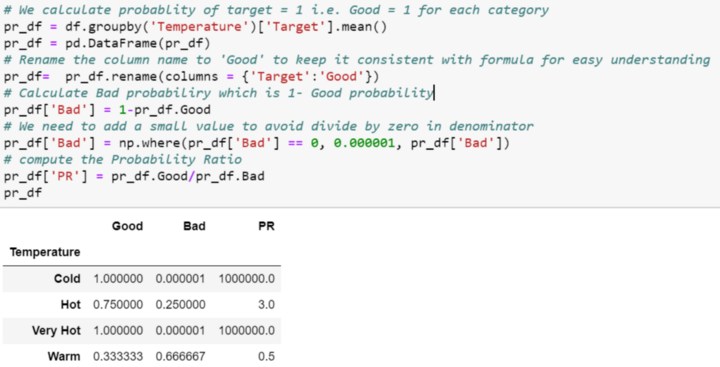

In [90]:
import numpy as np
pre = dataset.groupby('ord_2')['target'].mean()
pre = pd.DataFrame(pre)
pre = pre.rename(columns = {'target' : 'Good'})
pre['Bad'] =  1 - pre.Good
pre['Bad'] = np.where(pre.Bad == 0, 0.000001,pre.Bad)
pre['pre'] = pre.Good/pre.Bad
pre

,Good,Bad,pre
ord_2,,,
Boiling Hot,0.360961,0.639039,0.564850
Cold,0.257877,0.742123,0.347486
Freezing,0.225214,0.774786,0.290680
Hot,0.326315,0.673685,0.484373
Lava Hot,0.403126,0.596874,0.675397
Warm,0.288796,0.711204,0.406067


# Hashing

* Hashing converts categorical variables to a higher dimensional space of integers, where the distance between two vectors of categorical variables is approximately maintained by the transformed numerical dimensional space. 
* With Hashing, the number of dimensions will be far less than the number of dimensions with encoding like One Hot Encoding. 
* <font color = 'red'>This method is advantageous when the cardinality of categorical is very high.</font>

In [91]:
# https://contrib.scikit-learn.org/category_encoders/hashing.html
hasher = ce.hashing.HashingEncoder()
hashing = hasher.fit_transform(dataset['ord_5'],dataset['target'])
hashing

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
299995,0,0,0,0,1,0,0,0
299996,0,1,0,0,0,0,0,0
299997,0,0,0,0,1,0,0,0
299998,0,1,0,0,0,0,0,0


# Backward Difference Encoding

* In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a nominal or an ordinal variable.

* This technique falls under the contrast coding system for categorical features. A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables.

In [92]:
# https://contrib.scikit-learn.org/category_encoders/backward_difference.html
backward_encoder = ce.backward_difference.BackwardDifferenceEncoder()
bde = backward_encoder.fit_transform(dataset['ord_5'],dataset['target'])
bde

,intercept,ord_5_0,ord_5_1,ord_5_2,ord_5_3,ord_5_4,ord_5_5,ord_5_6,ord_5_7,ord_5_8,...,ord_5_181,ord_5_182,ord_5_183,ord_5_184,ord_5_185,ord_5_186,ord_5_187,ord_5_188,ord_5_189,ord_5_190
0,1,-0.994792,-0.989583,-0.984375,-0.979167,-0.973958,-0.96875,-0.963542,-0.958333,-0.953125,...,-0.052083,-0.046875,-0.041667,-0.036458,-0.03125,-0.026042,-0.020833,-0.015625,-0.010417,-0.005208
1,1,0.005208,-0.989583,-0.984375,-0.979167,-0.973958,-0.96875,-0.963542,-0.958333,-0.953125,...,-0.052083,-0.046875,-0.041667,-0.036458,-0.03125,-0.026042,-0.020833,-0.015625,-0.010417,-0.005208
2,1,0.005208,0.010417,-0.984375,-0.979167,-0.973958,-0.96875,-0.963542,-0.958333,-0.953125,...,-0.052083,-0.046875,-0.041667,-0.036458,-0.03125,-0.026042,-0.020833,-0.015625,-0.010417,-0.005208
3,1,0.005208,0.010417,0.015625,-0.979167,-0.973958,-0.96875,-0.963542,-0.958333,-0.953125,...,-0.052083,-0.046875,-0.041667,-0.036458,-0.03125,-0.026042,-0.020833,-0.015625,-0.010417,-0.005208
4,1,0.005208,0.010417,0.015625,0.020833,-0.973958,-0.96875,-0.963542,-0.958333,-0.953125,...,-0.052083,-0.046875,-0.041667,-0.036458,-0.03125,-0.026042,-0.020833,-0.015625,-0.010417,-0.005208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,0.005208,0.010417,0.015625,0.020833,0.026042,0.03125,0.036458,0.041667,0.046875,...,-0.052083,-0.046875,-0.041667,-0.036458,-0.03125,-0.026042,-0.020833,-0.015625,-0.010417,-0.005208
299996,1,0.005208,0.010417,0.015625,0.020833,0.026042,0.03125,0.036458,0.041667,0.046875,...,-0.052083,-0.046875,-0.041667,-0.036458,-0.03125,-0.026042,-0.020833,-0.015625,-0.010417,-0.005208
299997,1,0.005208,0.010417,0.015625,0.020833,0.026042,0.03125,0.036458,0.041667,0.046875,...,-0.052083,-0.046875,-0.041667,-0.036458,-0.03125,-0.026042,-0.020833,-0.015625,-0.010417,-0.005208
299998,1,0.005208,0.010417,0.015625,0.020833,0.026042,0.03125,0.036458,0.041667,0.046875,...,-0.052083,-0.046875,-0.041667,-0.036458,-0.03125,-0.026042,-0.020833,-0.015625,-0.010417,-0.005208


## Leave One Out Encoding

* This is very similar to target encoding but excludes the current row’s target when calculating the mean target for a level to reduce outliers.

In [93]:
loo_encoder = ce.leave_one_out.LeaveOneOutEncoder()
leave_one_out = loo_encoder.fit_transform(dataset['ord_5'],dataset['target'])
leave_one_out

,ord_5
0,0.401980
1,0.303997
2,0.206923
3,0.355736
4,0.404487
...,...
299995,0.313116
299996,0.225034
299997,0.177994
299998,0.437908


# James-Stein Encoding

* For feature value, the James-Stein estimator returns a weighted average of:

1. The mean target value for the observed feature value.
2. The mean target value (regardless of the feature value).

* The James-Stein encoder shrinks the average toward the overall average. It is a target based encoder. James-Stein estimator has, however, one practical limitation — it was defined only for normal distributions.

In [95]:
# https://contrib.scikit-learn.org/category_encoders/jamesstein.html
james_encoder = ce.james_stein.JamesSteinEncoder()
james = james_encoder.fit_transform(dataset['ord_5'],dataset['target'])
james

,ord_5
0,0.351077
1,0.304868
2,0.249570
3,0.330239
4,0.352552
...,...
299995,0.309435
299996,0.261030
299997,0.229962
299998,0.368007


## M-estimator Encoding
* M-Estimate Encoder is a simplified version of Target Encoder. It has only one hyper-parameter — m, which represents the power of regularization. The higher the value of m results, into stronger the shrinking. Recommended values for m is in the range of 1 to 100.

In [96]:
# https://contrib.scikit-learn.org/category_encoders/mestimate.html
mestimateencoder = ce.m_estimate.MEstimateEncoder()
mestimate = james_encoder.fit_transform(dataset['ord_5'],dataset['target'])
mestimate

,ord_5
0,0.351077
1,0.304868
2,0.249570
3,0.330239
4,0.352552
...,...
299995,0.309435
299996,0.261030
299997,0.229962
299998,0.368007


## Conclusion
* It is essential to understand that all these encodings do not work well in all situations or for every dataset for all machine learning models. 
* We as Data Scientists still need to experiment and find out which works best for our specific case. If test data has different classes, some of these methods won’t work as features won’t be similar. 
* There are few benchmark publications by research communities, but it’s not conclusive which works best. My recommendation will be to try each of these with the smaller datasets and then decide where to focus on tuning the encoding process. 
* we can use the below cheat-sheet as a guiding tool.

pic credits : https://innovation.alteryx.com/
<center><img src = 'https://miro.medium.com/max/720/0*NBVi7M3sGyiUSyd5.png' ></center>